In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc
import linecache

## 物理定数

pi           = np.pi                    # PI
k_b          = sc.k*1e7                 # Boltzmann constant in erg/K
m_p          = sc.proton_mass*1e3       # proton mass in g
Grav         = sc.G*1e3                 # gravitational constant in cm^3 g^-1 s^-2
AU           = sc.au*1e2                # astronomical unit in cm
yr         = sc.Julian_year             # year in s
mu           = 2.34e0                    # mean molecular mass in proton masses
M_sun        = 1.9891e+33               # mass of the sun in g
R_sun        = 69550800000.0            # radius of the sun in cm
L_sun        = 3.828000000000000255e+33
sigmaSB      = 5.670500000000000003e-05

In [10]:
## data ID
ID_RADIUS = 0   # radius
ID_SIGMAG = 1   # gas surface density
ID_TEMP   = 2   # temperature
ID_CS     = 3   # sound speed
ID_OMEGA  = 4   # angular velocity
ID_HG     = 5   # gas scale height
ID_QT     = 6   # Toomre's Q parameter
ID_MR     = 7   # enclosed mass
ID_ALPHA  = 8   # alpha parameter
ID_VGR    = 9  # gas radial velocity
ID_VGRVIS = 10  # viscous velocity
ID_VGRETA = 11  # gas pressure gradient velocity
ID_VGRSRC = 12  # velocty by source term
# ID_CVGVIS = 15  # gas viscous velocity coefficient by gas and dust interaction
# ID_CVGETA = 16  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_SGINF  = 13  # infall rate per area
ID_SGWIND = 14  # wind rate per area
ID_SIGMAD = 15  # dust surface density
ID_VDR    = 16  # dust radial velocity
# ID_CVDVIS = 25  # dust viscous velocity coefficient by gas and dust interaction
# ID_CVDETA = 26  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_MAX    = 17  # number of data ID

def read_input(filename):
    file = open(filename, 'r', encoding='UTF-8')
    d = file.readlines()
    nlen = len(d)
    input_prams = {}
    for i in range(nlen):
        line = d[i].split()
        if len(line) == 0:
            continue
        if (line[0] == '\n') or (line[0] == '#'):
            continue
        input_prams[line[0]] = line[2]
    return input_prams
        

def read_data(filename, nr):
    with open(filename) as f:
        data = np.fromfile(f, dtype=float)
        time = data[0]
        data = data[15:].reshape([ID_MAX, nr])
    return time, data

In [11]:
dir_name = "output/fiducial/"
inputfile = dir_name + "input"

input_params = read_input(inputfile)
nr = int(input_params['nr'])

logfile = dir_name + "log"

# plot_time = [2.3e5, 2.4e5, 2.5e5, 2.6e5]
plot_time = [9.0e4, 1.0e5, 1.02e5, 1.04e5]
# plot_time = [1.1e5, 1.2e5, 1.3e5, 1.4e5]
# plot_time = [1.58e5, 1.61e5, 1.64e5, 1.7e5]
# plot_time = [1.2e5, 1.4e5, 1.6e5, 1.80e5]
# plot_time = [1.70e5, 1.72e5, 1.74e5, 1.75e5]
# plot_time = [1.89e5, 2.3e5, 2.6e5, 2.999e5]
# plot_time = [2.3e5, 2.5e5, 2.7e5, 2.9e5]
# plot_time = [3.0e5, 3.3e5, 3.6e5, 3.9e5]
# plot_time = [3.0e5, 4.0e5, 5.0e5, 6.0e5]
# plot_time = [6.0e5, 7.3e5, 8.6e5, 9.9e5]
plot_count = []

log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
time  = log_data[1]
ndata = len(count)
time_index = 0
for i in range(ndata):
    if plot_time[time_index] <= (time[i]/yr):
        plot_count.append(int(count[i]))
        time_index += 1
        if (time_index == len(plot_time)):
            break
            
print(plot_count)

[900, 4234, 4901, 5567]


In [12]:
file1 = dir_name + "disk" + str(plot_count[0])
file2 = dir_name + "disk" + str(plot_count[1])
file3 = dir_name + "disk" + str(plot_count[2])
file4 = dir_name + "disk" + str(plot_count[3])

time1, data1 = read_data(file1, nr)
time1 = "{:.2e}".format(time1/yr) + "year"

time2, data2 = read_data(file2, nr)
time2 = "{:.2e}".format(time2/yr) + "year"

time3, data3 = read_data(file3, nr)
time3 = "{:.2e}".format(time3/yr) + "year"

time4, data4 = read_data(file4, nr)
time4 = "{:.2e}".format(time4/yr) + "year"

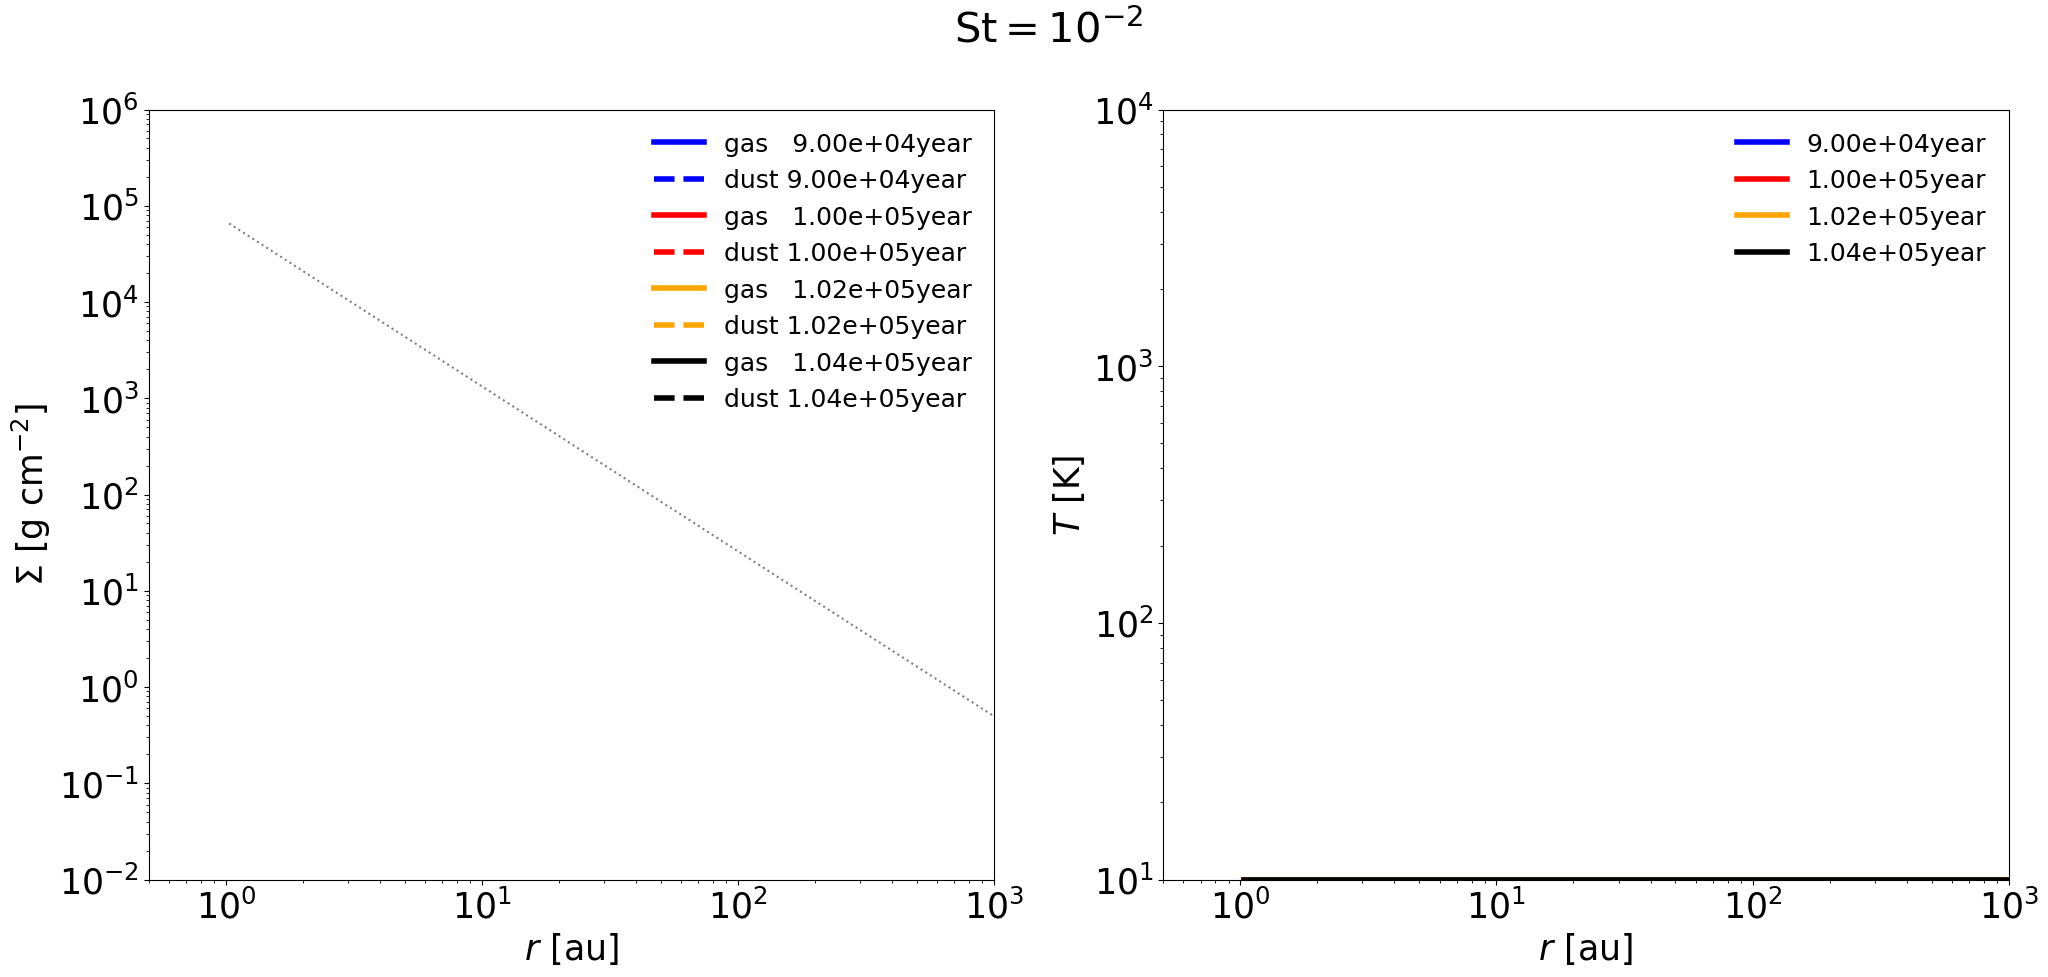

In [14]:
x = data1[ID_RADIUS] / AU

fontsize = 25

fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"$\Sigma \ [\mathrm{g \ cm^{-2}}]$", fontsize=fontsize)
ax1.plot(x, data1[ID_SIGMAG], label="gas   "+time1, color="blue", lw=lw)
ax1.plot(x, data1[ID_SIGMAD], linestyle="dashed", label="dust "+time1, color="blue", lw=lw)
# ax1.plot(x, data1[ID_FV], linestyle="dotted", label="vapor "+time1, color="blue", lw=lw)

ax1.plot(x, data2[ID_SIGMAG], label="gas   "+time2, color="red", lw=lw)
ax1.plot(x, data2[ID_SIGMAD], linestyle="dashed", label="dust "+time2, color="red", lw=lw)
# ax1.plot(x, data2[ID_FV], linestyle="dotted", label="vapor "+time2, color="red", lw=lw)

ax1.plot(x, data3[ID_SIGMAG], label="gas   "+time3, color="orange", lw=lw)
ax1.plot(x, data3[ID_SIGMAD], linestyle="dashed", label="dust "+time3, color="orange", lw=lw)
# ax1.plot(x, data3[ID_FV], linestyle="dotted", label="vapor "+time3, color="orange", lw=lw)

ax1.plot(x, data4[ID_SIGMAG], label="gas   "+time4, color="black", lw=lw)
ax1.plot(x, data4[ID_SIGMAD], linestyle="dashed", label="dust "+time4, color="black", lw=lw)
# ax1.plot(x, data4[ID_FV], linestyle="dotted", label="vapor "+time4, color="black", lw=lw)

ax1.plot(x, SQ, linestyle="dotted", color="gray")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-2, 1.0e6)
ax1.set_xlim(5.0e-1, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$T \ [\mathrm{K}]$", fontsize=fontsize)
ax2.plot(x, data1[ID_TEMP], label=time1, color="blue", lw=lw)
ax2.plot(x, data2[ID_TEMP], label=time2, color="red", lw=lw)
ax2.plot(x, data3[ID_TEMP], label=time3, color="orange", lw=lw)
ax2.plot(x, data4[ID_TEMP], label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1.0e1, 1.0e4)
ax2.set_xlim(5.0e-1, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

In [69]:
dir_name = "output/fiducial/"
# dir_name = "output/dust_gap_disk/"
# dir_name = "output/filled_dust_disk/"
# dir_name = "output/dust_poor_disk/"
# dir_name = "output/normal_filled_disk/"
file1 = dir_name + "disk0" 
file2 = dir_name + "disk2"
file3 = dir_name + "disk5" 
file4 = dir_name + "disk6"  

skiprows = 7
year = " yr"

time1 = float(linecache.getline(file1, 2).split()[-1])
time1 = "{:.2e}".format(time1) + year
data = np.loadtxt(file1, dtype=float, skiprows=skiprows).T
x = data[0]
S1 = data[1]
T1 = data[2]
cs1 = data[3]
omega1 = data[4]
hg1 = data[5]
alpha1 = data[6]
vr_gas1 = data[7]
vr_gas_vis1 = data[8]
vr_gas_eta1 = data[9]
vr_gas_src1 = data[10]
SD1 = data[11]
vr_dust1 = data[12]
linecache.clearcache()

time2 = float(linecache.getline(file2, 2).split()[-1])
time2 = "{:.2e}".format(time2) + year
data = np.loadtxt(file2, dtype=float, skiprows=skiprows).T
x = data[0]
S2 = data[1]
T2 = data[2]
cs2 = data[3]
omega2 = data[4]
hg2 = data[5]
alpha2 = data[6]
vr_gas2 = data[7]
vr_gas_vis2 = data[8]
vr_gas_eta2 = data[9]
vr_gas_src2 = data[10]
SD2 = data[11]
vr_dust2 = data[12]
linecache.clearcache()

time3 = float(linecache.getline(file3, 2).split()[-1])
time3 = "{:.2e}".format(time3) + year
data = np.loadtxt(file3, dtype=float, skiprows=skiprows).T
x = data[0]
S3 = data[1]
T3 = data[2]
cs3 = data[3]
omega3 = data[4]
hg3 = data[5]
alpha3 = data[6]
vr_gas3 = data[7]
vr_gas_vis3 = data[8]
vr_gas_eta3 = data[9]
vr_gas_src3 = data[10]
SD3 = data[11]
vr_dust3 = data[12]
linecache.clearcache()

time4 = float(linecache.getline(file4, 2).split()[-1])
time4 = "{:.2e}".format(time4) + year
data = np.loadtxt(file4, dtype=float, skiprows=skiprows).T
x = data[0]
S4 = data[1]
T4 = data[2]
cs4 = data[3]
omega4 = data[4]
hg4 = data[5]
alpha4 = data[6]
vr_gas4 = data[7]
vr_gas_vis4 = data[8]
vr_gas_eta4 = data[9]
vr_gas_src4 = data[10]
SD4 = data[11]
vr_dust4 = data[12]

x = x/AU
fontsize = 25

xAU = x*AU

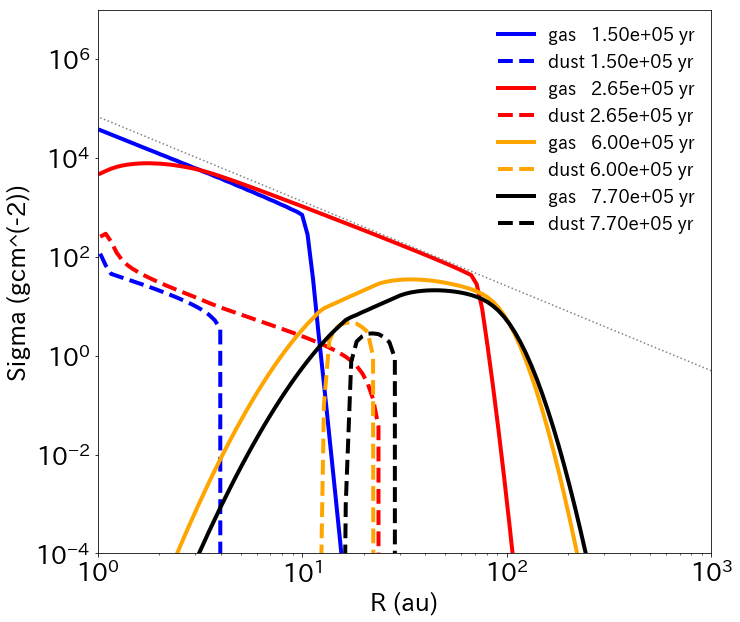

In [70]:
SQ = 6.9e4 * x**(-12/7)

lw = 4
plt.figure(figsize=(11, 10))
plt.xlabel("R (au)", fontsize= fontsize)
plt.ylabel("Sigma (gcm^(-2))", fontsize=fontsize)
plt.plot(x, S1, label="gas   "+time1, color="blue", lw=lw)
plt.plot(x, SD1, linestyle="dashed", label="dust "+time1, color="blue", lw=lw)
plt.plot(x, S2, label="gas   "+time2, color="red", lw=lw)
plt.plot(x, SD2, linestyle="dashed", label="dust "+time2, color="red", lw=lw)
plt.plot(x, S3, label="gas   "+time3, color="orange", lw=lw)
plt.plot(x, SD3, linestyle="dashed", label="dust "+time3, color="orange", lw=lw)
plt.plot(x, S4, label="gas   "+time4, color="black", lw=lw)
plt.plot(x, SD4, linestyle="dashed", label="dust "+time4, color="black", lw=lw)
plt.plot(x, SQ, linestyle="dotted", color="gray")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.0e-4, 1.0e7)
plt.xlim(1.0e0, 1.0e3)
plt.tick_params(labelsize=fontsize)
plt.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")
plt.show()

In [11]:
print(x)

[1.03117778e+00 1.09647817e+00 1.16591432e+00 1.23974826e+00
 1.31825673e+00 1.40173787e+00 1.49050517e+00 1.58489355e+00
 1.68525928e+00 1.79198139e+00 1.90546094e+00 2.02612710e+00
 2.15443508e+00 2.29086817e+00 2.43594109e+00 2.59020064e+00
 2.75422904e+00 2.92864529e+00 3.11410649e+00 3.31131184e+00
 3.52100600e+00 3.74397909e+00 3.98107271e+00 4.23317990e+00
 4.50125324e+00 4.78630208e+00 5.08940198e+00 5.41169601e+00
 5.75440075e+00 6.11880701e+00 6.50628980e+00 6.91831371e+00
 7.35642155e+00 7.82228380e+00 8.31763844e+00 8.84436385e+00
 9.40445204e+00 1.00000020e+01 1.06332663e+01 1.13066382e+01
 1.20226444e+01 1.27839988e+01 1.35935692e+01 1.44544036e+01
 1.53697508e+01 1.63430602e+01 1.73780147e+01 1.84784983e+01
 1.96486821e+01 2.08929645e+01 2.22160448e+01 2.36229098e+01
 2.51188669e+01 2.67095580e+01 2.84009858e+01 3.01995207e+01
 3.21119544e+01 3.41454927e+01 3.63078096e+01 3.86070602e+01
 4.10519145e+01 4.36515906e+01 4.64158946e+01 4.93552546e+01
 5.24807537e+01 5.580418

In [23]:
1 / 150

0.006666666666666667

/home/kawasaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


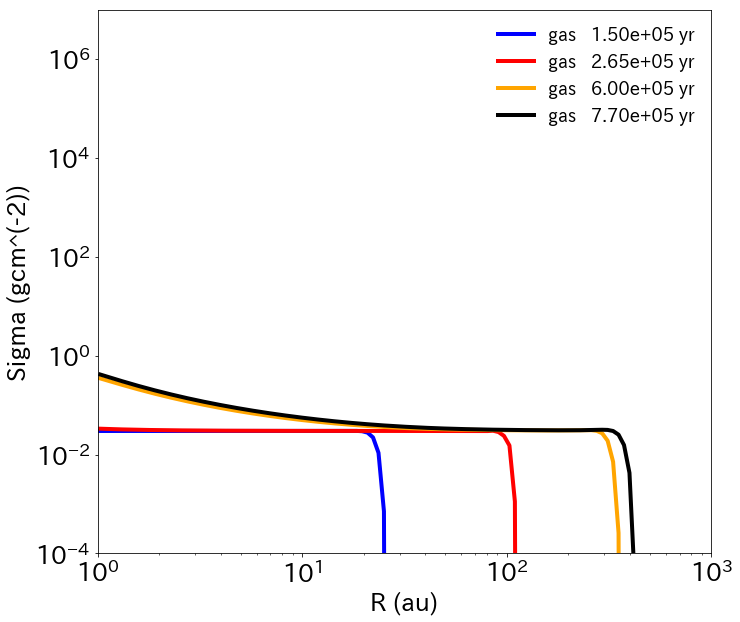

In [60]:
fdg1 = np.where(np.abs(S1) > 1.0e-10, SD1 / S1, np.nan)
fdg2 = np.where(np.abs(S2) > 1.0e-10, SD2 / S2, np.nan)
fdg3 = np.where(np.abs(S3) > 1.0e-10, SD3 / S3, np.nan)
fdg4 = np.where(np.abs(S4) > 1.0e-10, SD4 / S4, np.nan)

lw = 4
plt.figure(figsize=(11, 10))
plt.xlabel("R (au)", fontsize= fontsize)
plt.ylabel("Sigma (gcm^(-2))", fontsize=fontsize)
plt.plot(x, fdg1, label="gas   "+time1, color="blue", lw=lw)
plt.plot(x, fdg2, label="gas   "+time2, color="red", lw=lw)
plt.plot(x, fdg3, label="gas   "+time3, color="orange", lw=lw)
plt.plot(x, fdg4, label="gas   "+time4, color="black", lw=lw)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.0e-4, 1.0e7)
plt.xlim(1.0e0, 1.0e3)
plt.tick_params(labelsize=fontsize)
plt.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")
plt.show()

In [ ]:
star mass  = 1.186238e+00 solar mass
total mass = 1.324170e+00 solar mass
total count = 74044
time = 6.079000e+00sec

In [220]:
1.504871 /1.01

1.489971287128713

In [216]:
1.169180e+00 + 3.356905e-01

1.5048705

In [81]:
280 * (0.1)**(-1/2)

885.4377448471462